## Introdução

### O Objetivo:
Imaginemos uma seguradora de veículos automotivos que busca inovação em seus negócios...Utilizando avançadas técnicas de machine learning ela consegue prever quais clientes tem maiores chances de sofrer algum tipo de acidente...
Com essas previsões a seguradora implemeta medidas preventivas reduzindo significativamte o número de acidentes e melhorando a segurança nas estradas.
Com uma alta assertividade do modelo a empresa consegue cobrar prêmios justos de seus clientes aumentando assim não só seus lucros mas também a
satisfação de seus clientes que nesse caso é um fator determinante para o sucesso de seus négocios...
Também são disponibilizados diferentes tipos de abordagens, uma que permite prever a ocorrência ou não de acidentes, e uma que prevê a gravidade da ocorrência, bem como aspectos de explicabilidade do modelo, 
que dão mais transparência para que os gestores da empresa entendam como o modelo está tomando suas decisões e quais características do cliente são mais determinantes para a ocorrência ou não de acidentes...
Essas e outras funcionalidades serão implementadas através de uma aplicação Web, assim como outras funcionalidades adicionais que tornarão a aplicação extremamente intuitiva e funcional...

In [4]:
#Importação das bibliotecas
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from seaborn import heatmap
import h2o
from h2o.automl import H2OAutoML
from tpot import TPOTClassifier
import warnings

In [5]:
#Visualização dos dados brutos
insurance = pd.read_csv("insurance.csv").drop("Unnamed: 0", axis=1)
insurance

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [6]:
#Clientes que não sofreram acidentes está preenchido com None, vamos preencher corretamente para evitar possíveis problemas
insurance.fillna("None", inplace=True)

In [7]:
#Visualização da classe
insurance.groupby(insurance["Accident"]).size()

Accident
Mild         1738
Moderate     1604
None        14336
Severe       2322
dtype: int64

In [8]:
#Transformação em problema binário  (Ocorrência ou não)
insurance.loc[insurance["Accident"].isin(["Mild", "Moderate", "Severe"]), "Accident"] = "Accident"
insurance.groupby("Accident").size()

Accident
Accident     5664
None        14336
dtype: int64

In [9]:
print(insurance.dtypes)

GoodStudent       bool
Age             object
SocioEcon       object
RiskAversion    object
VehicleYear     object
ThisCarDam      object
RuggedAuto      object
Accident        object
MakeModel       object
DrivQuality     object
Mileage         object
Antilock          bool
DrivingSkill    object
SeniorTrain       bool
ThisCarCost     object
Theft             bool
CarValue        object
HomeBase        object
AntiTheft         bool
PropCost        object
OtherCarCost    object
OtherCar          bool
MedCost         object
Cushioning      object
Airbag            bool
ILiCost         object
DrivHist        object
dtype: object


In [10]:
insurance = insurance.astype("category")
insurance.dtypes

GoodStudent     category
Age             category
SocioEcon       category
RiskAversion    category
VehicleYear     category
ThisCarDam      category
RuggedAuto      category
Accident        category
MakeModel       category
DrivQuality     category
Mileage         category
Antilock        category
DrivingSkill    category
SeniorTrain     category
ThisCarCost     category
Theft           category
CarValue        category
HomeBase        category
AntiTheft       category
PropCost        category
OtherCarCost    category
OtherCar        category
MedCost         category
Cushioning      category
Airbag          category
ILiCost         category
DrivHist        category
dtype: object

## Visualização

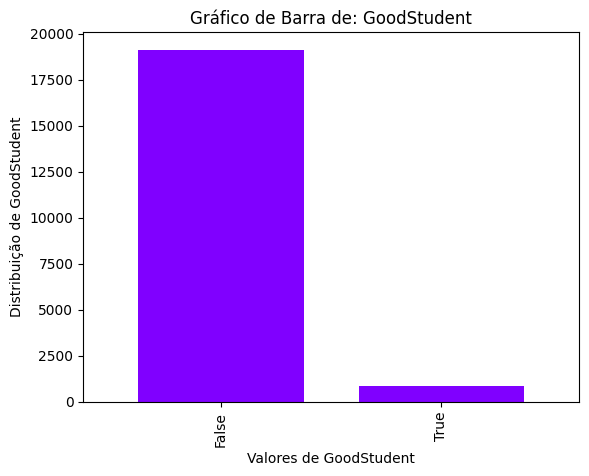

Resumo Estatístico de: GoodStudent 

count     20000
unique        2
top       False
freq      19115
Name: GoodStudent, dtype: object
 
 Nulos na Coluna: 0


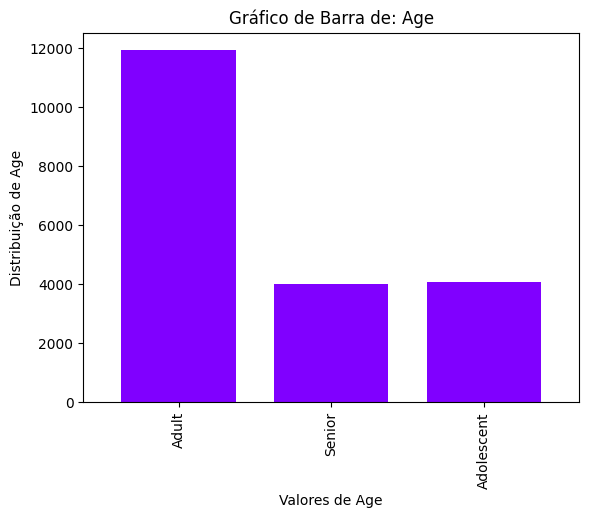

Resumo Estatístico de: Age 

count     20000
unique        3
top       Adult
freq      11939
Name: Age, dtype: object
 
 Nulos na Coluna: 0


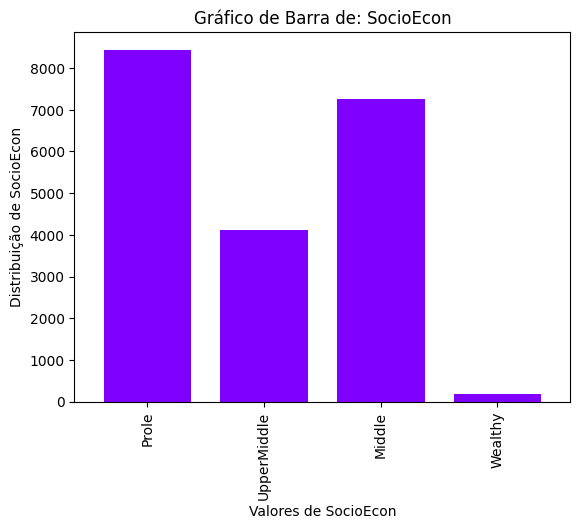

Resumo Estatístico de: SocioEcon 

count     20000
unique        4
top       Prole
freq       8444
Name: SocioEcon, dtype: object
 
 Nulos na Coluna: 0


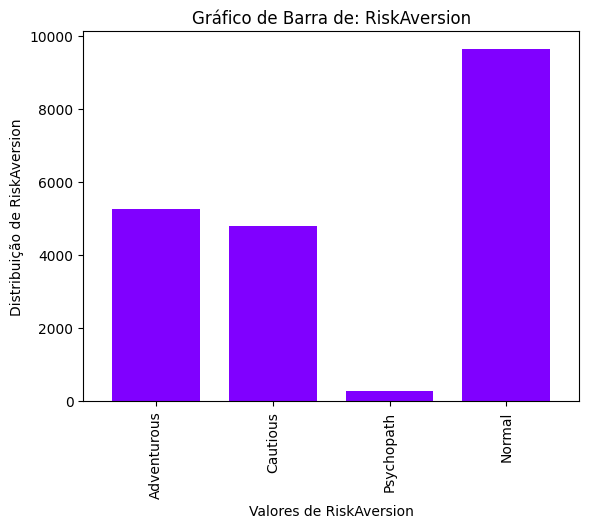

Resumo Estatístico de: RiskAversion 

count      20000
unique         4
top       Normal
freq        9644
Name: RiskAversion, dtype: object
 
 Nulos na Coluna: 0


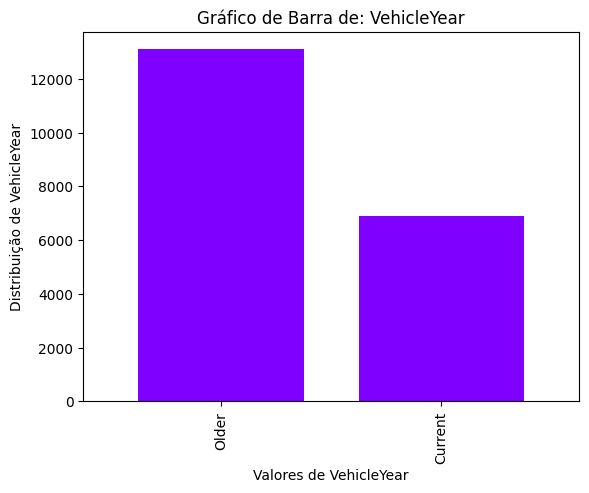

Resumo Estatístico de: VehicleYear 

count     20000
unique        2
top       Older
freq      13089
Name: VehicleYear, dtype: object
 
 Nulos na Coluna: 0


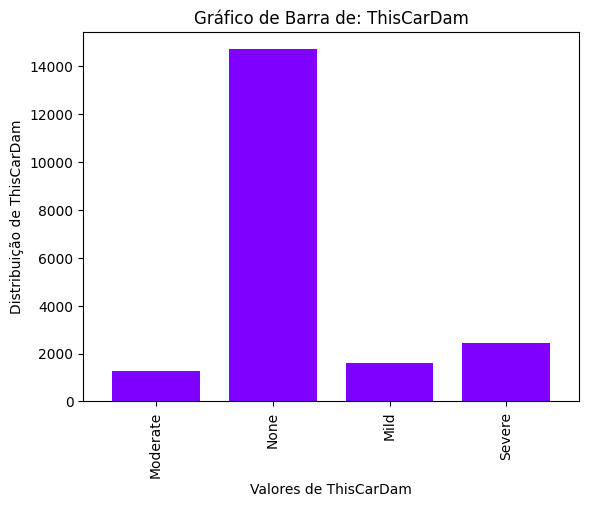

Resumo Estatístico de: ThisCarDam 

count     20000
unique        4
top        None
freq      14681
Name: ThisCarDam, dtype: object
 
 Nulos na Coluna: 0


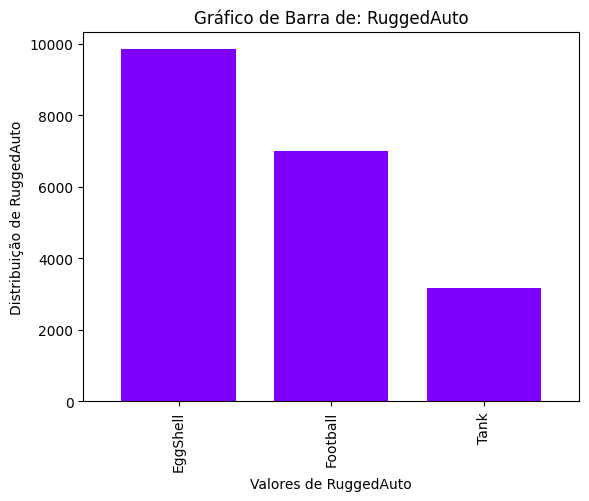

Resumo Estatístico de: RuggedAuto 

count        20000
unique           3
top       EggShell
freq          9838
Name: RuggedAuto, dtype: object
 
 Nulos na Coluna: 0


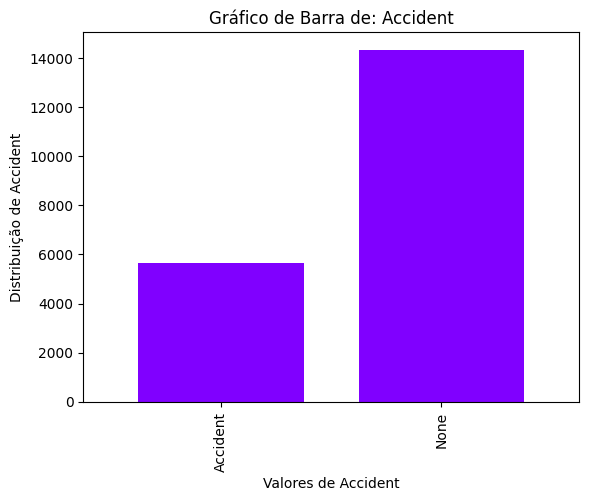

Resumo Estatístico de: Accident 

count     20000
unique        2
top        None
freq      14336
Name: Accident, dtype: object
 
 Nulos na Coluna: 0


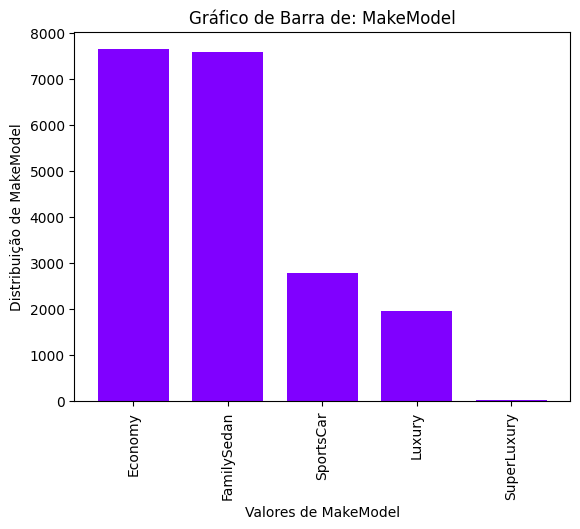

Resumo Estatístico de: MakeModel 

count       20000
unique          5
top       Economy
freq         7637
Name: MakeModel, dtype: object
 
 Nulos na Coluna: 0


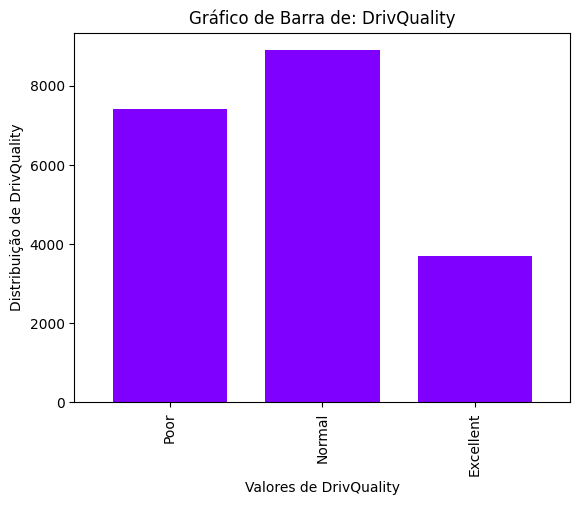

Resumo Estatístico de: DrivQuality 

count      20000
unique         3
top       Normal
freq        8897
Name: DrivQuality, dtype: object
 
 Nulos na Coluna: 0


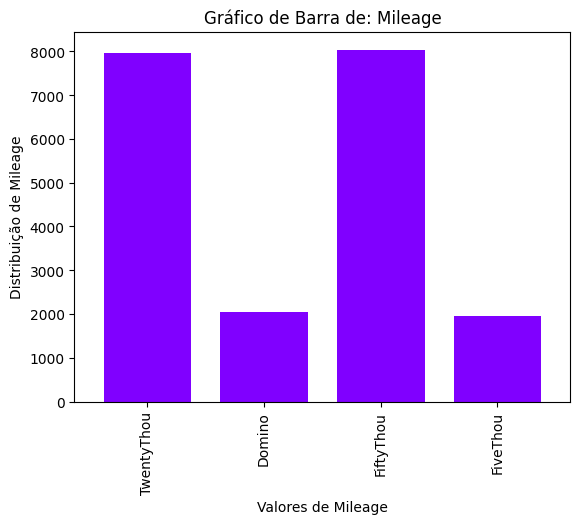

Resumo Estatístico de: Mileage 

count         20000
unique            4
top       FiftyThou
freq           8041
Name: Mileage, dtype: object
 
 Nulos na Coluna: 0


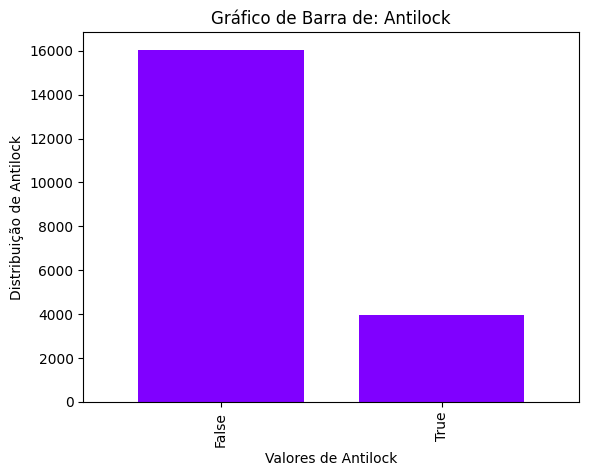

Resumo Estatístico de: Antilock 

count     20000
unique        2
top       False
freq      16041
Name: Antilock, dtype: object
 
 Nulos na Coluna: 0


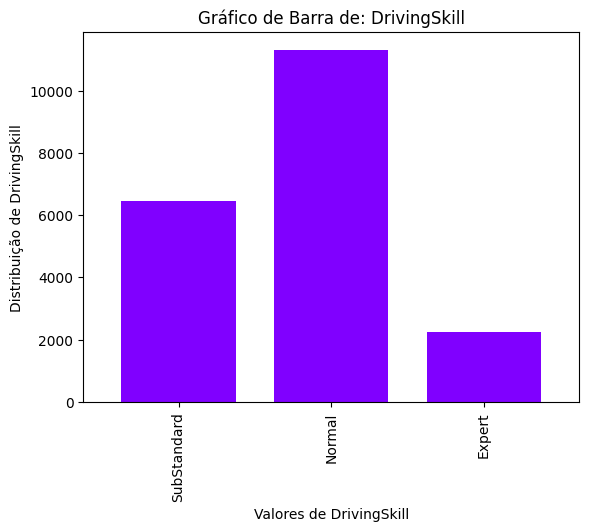

Resumo Estatístico de: DrivingSkill 

count      20000
unique         3
top       Normal
freq       11308
Name: DrivingSkill, dtype: object
 
 Nulos na Coluna: 0


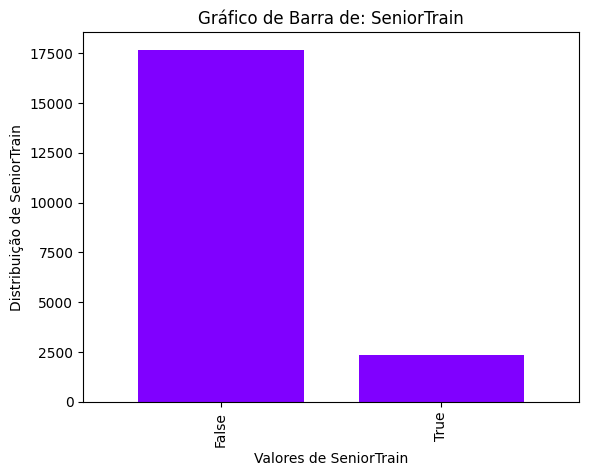

Resumo Estatístico de: SeniorTrain 

count     20000
unique        2
top       False
freq      17665
Name: SeniorTrain, dtype: object
 
 Nulos na Coluna: 0


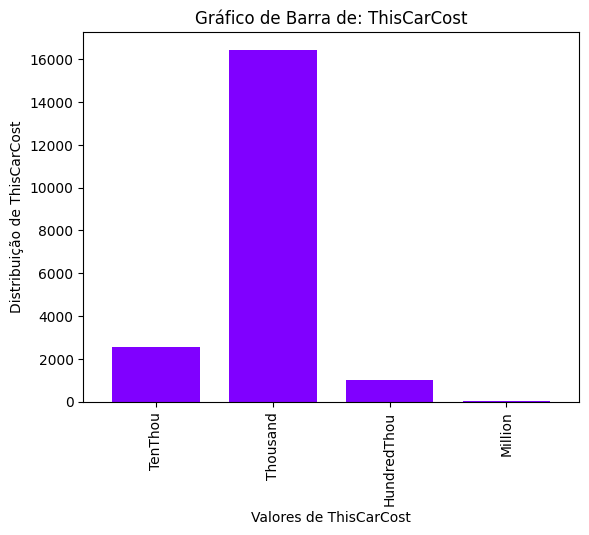

Resumo Estatístico de: ThisCarCost 

count        20000
unique           4
top       Thousand
freq         16443
Name: ThisCarCost, dtype: object
 
 Nulos na Coluna: 0


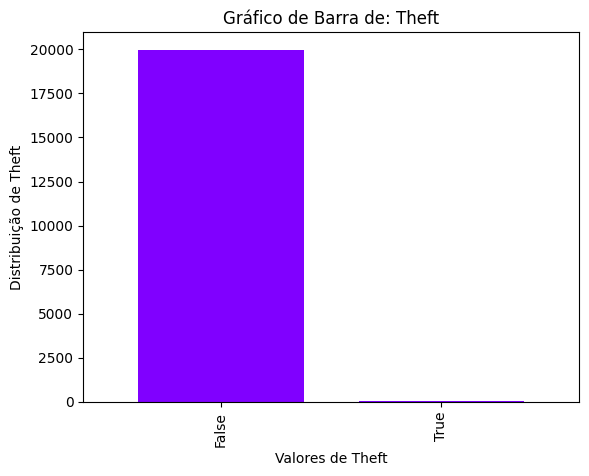

Resumo Estatístico de: Theft 

count     20000
unique        2
top       False
freq      19969
Name: Theft, dtype: object
 
 Nulos na Coluna: 0


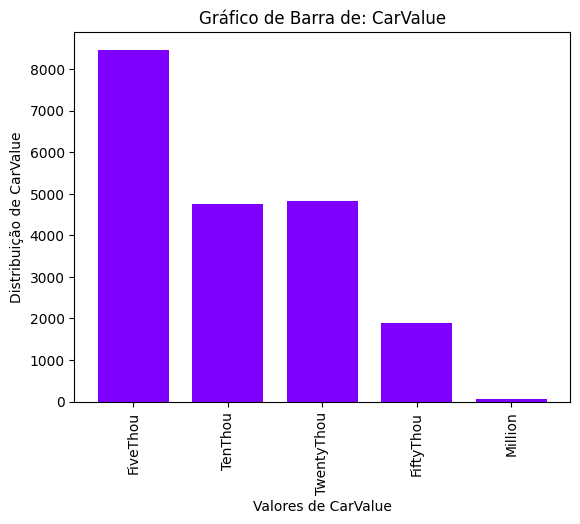

Resumo Estatístico de: CarValue 

count        20000
unique           5
top       FiveThou
freq          8467
Name: CarValue, dtype: object
 
 Nulos na Coluna: 0


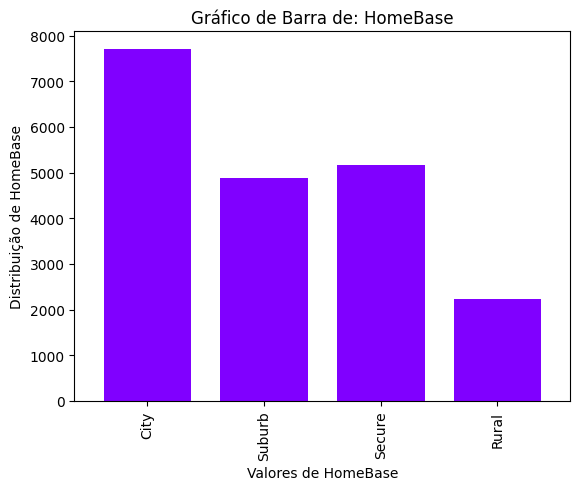

Resumo Estatístico de: HomeBase 

count     20000
unique        4
top        City
freq       7709
Name: HomeBase, dtype: object
 
 Nulos na Coluna: 0


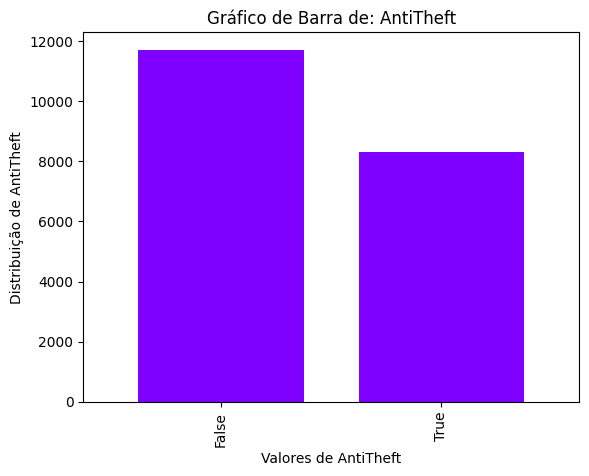

Resumo Estatístico de: AntiTheft 

count     20000
unique        2
top       False
freq      11705
Name: AntiTheft, dtype: object
 
 Nulos na Coluna: 0


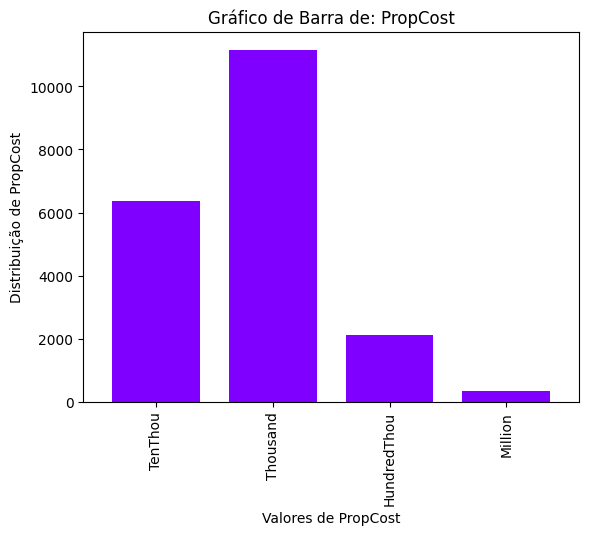

Resumo Estatístico de: PropCost 

count        20000
unique           4
top       Thousand
freq         11170
Name: PropCost, dtype: object
 
 Nulos na Coluna: 0


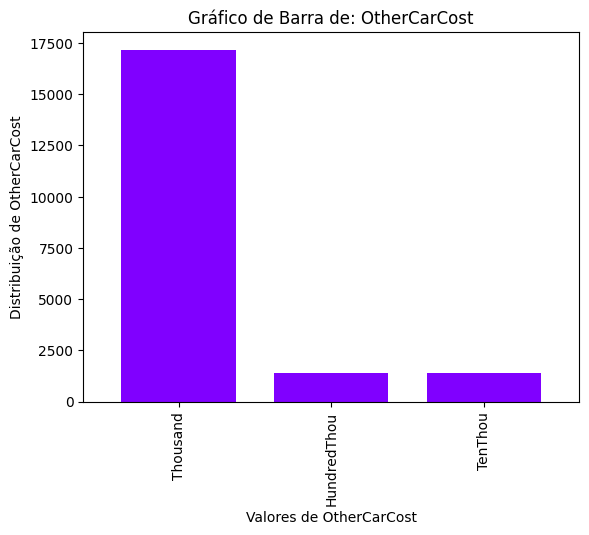

Resumo Estatístico de: OtherCarCost 

count        20000
unique           3
top       Thousand
freq         17180
Name: OtherCarCost, dtype: object
 
 Nulos na Coluna: 0


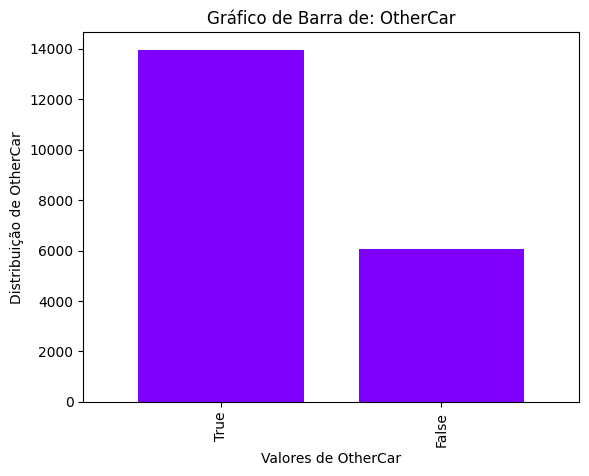

Resumo Estatístico de: OtherCar 

count     20000
unique        2
top        True
freq      13955
Name: OtherCar, dtype: object
 
 Nulos na Coluna: 0


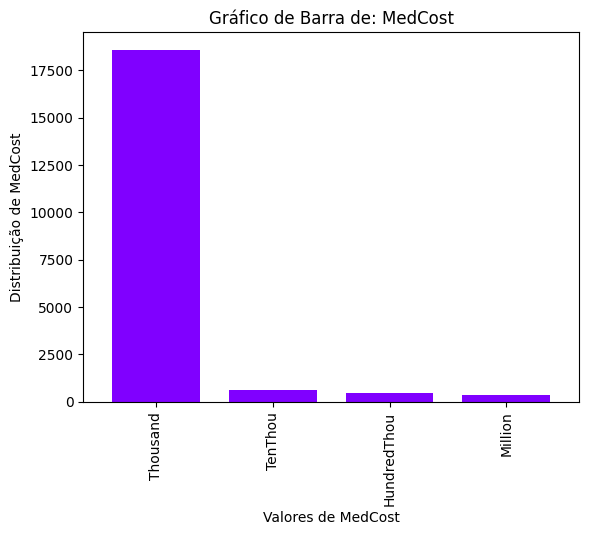

Resumo Estatístico de: MedCost 

count        20000
unique           4
top       Thousand
freq         18589
Name: MedCost, dtype: object
 
 Nulos na Coluna: 0


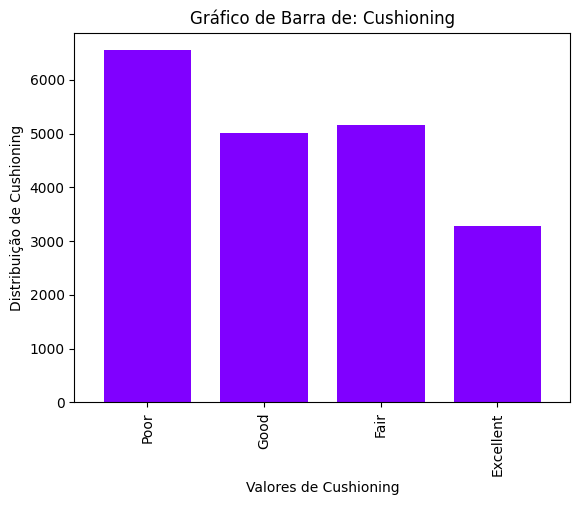

Resumo Estatístico de: Cushioning 

count     20000
unique        4
top        Poor
freq       6547
Name: Cushioning, dtype: object
 
 Nulos na Coluna: 0


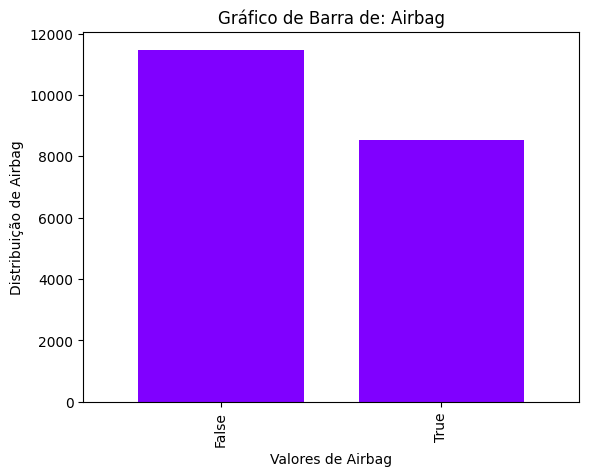

Resumo Estatístico de: Airbag 

count     20000
unique        2
top       False
freq      11468
Name: Airbag, dtype: object
 
 Nulos na Coluna: 0


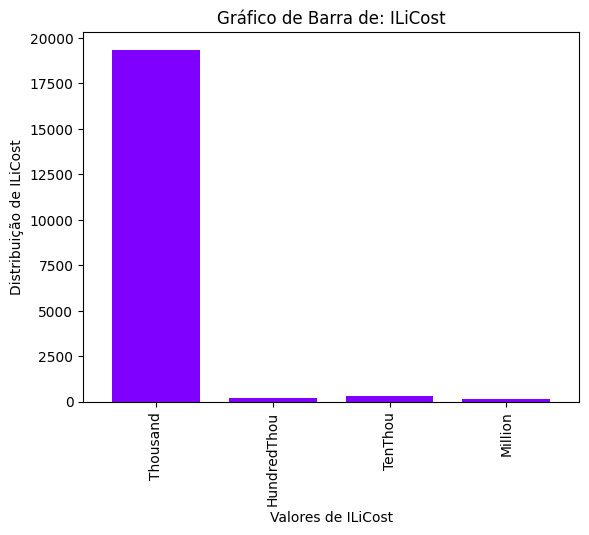

Resumo Estatístico de: ILiCost 

count        20000
unique           4
top       Thousand
freq         19356
Name: ILiCost, dtype: object
 
 Nulos na Coluna: 0


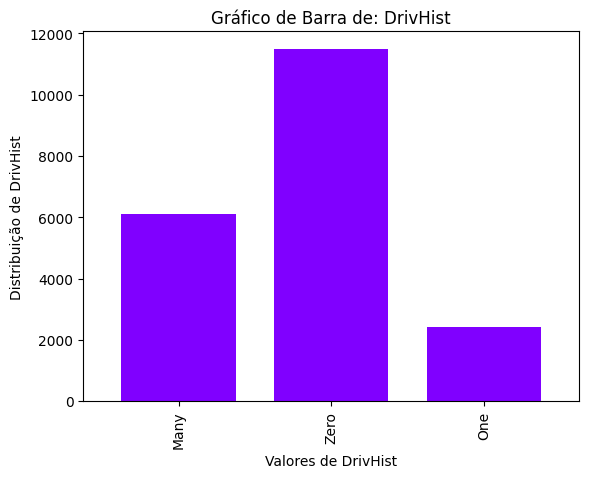

Resumo Estatístico de: DrivHist 

count     20000
unique        3
top        Zero
freq      11486
Name: DrivHist, dtype: object
 
 Nulos na Coluna: 0


In [43]:
for col in insurance.columns:
    insurance.groupby(col, observed=True).size().plot(kind="bar", width = 0.75, cmap= "rainbow")
    plt.title(f"Gráfico de Barra de: {col}")
    plt.ylabel(f"Distribuição de {col}")
    plt.xlabel(f"Valores de {col}")
    plt.show()

    print(f"Resumo Estatístico de: {col} \n")
    print(insurance[col].describe() )

    nulos = insurance[col].isnull().sum()
    print(f" \n Nulos na Coluna: {nulos}")

Codificação dos atributos para valor numérico

In [11]:
for colunas in insurance.columns:
    insurance[colunas] = insurance[colunas].cat.codes
insurance

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,0,1,1,0,1,1,0,0,0,2,...,0,0,2,2,1,3,3,0,3,0
1,0,2,1,1,0,2,1,1,0,1,...,0,1,3,2,1,3,2,1,3,2
2,0,2,2,3,0,2,1,1,1,0,...,0,0,3,2,0,3,2,1,3,1
3,0,0,0,2,1,2,0,1,0,1,...,3,0,3,2,1,3,1,0,3,2
4,0,0,1,2,1,1,1,0,0,2,...,0,0,2,2,0,3,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,1,0,1,0,1,0,0,2,...,0,0,3,2,1,3,1,0,3,0
19996,0,1,0,2,1,2,2,1,1,1,...,3,0,3,2,1,3,2,0,3,2
19997,0,2,2,2,0,2,1,1,2,0,...,2,1,2,2,0,3,0,1,3,2
19998,0,1,0,2,1,2,1,1,1,0,...,3,0,3,2,1,3,2,1,3,2


Pudemos verificar que temos atributos altamente correlacionados então vamos eliminá-los para evitar resultados irrealistas

<Axes: >

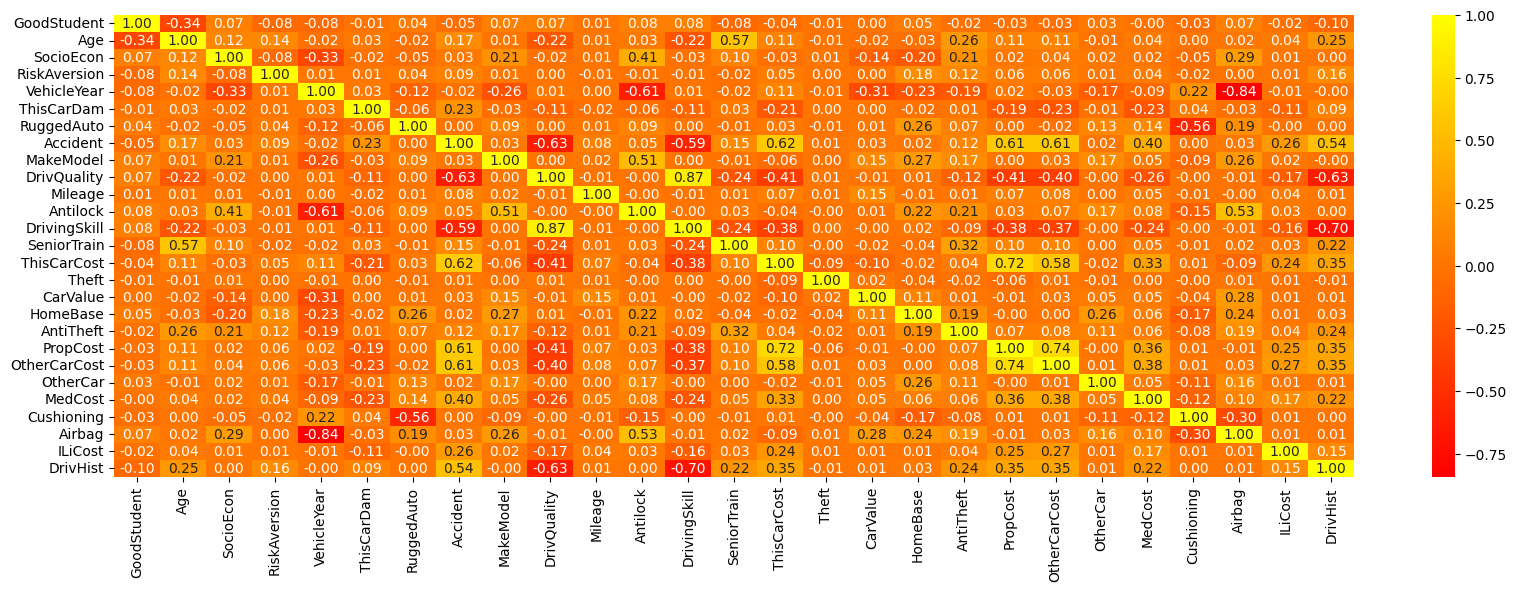

In [11]:
plt.figure(figsize=(20,6))
corr = insurance.corr()
heatmap(corr, fmt=".2f", cmap="autumn", annot=True)

Temos vários atributos altamente relacionados então vamos eliminá-los, também temos o atributo "ThisCarDam" que pode vazar dados que o modelo não deveria receber em seu treinamento, então também vamos eliminá-lo

In [12]:
insurance.drop( columns=["ThisCarDam", "SeniorTrain", "Airbag", 
                                            "Cushioning", "MakeModel", "DrivQuality", "DrivHist", "OtherCarCost", "PropCost"], inplace=True)
insurance.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,RuggedAuto,Accident,Mileage,Antilock,DrivingSkill,ThisCarCost,Theft,CarValue,HomeBase,AntiTheft,OtherCar,MedCost,ILiCost
0,0,1,1,0,1,0,0,3,0,2,2,0,1,0,0,1,3,3
1,0,2,1,1,0,1,1,3,0,1,3,0,3,0,1,1,3,3
2,0,2,2,3,0,1,1,0,1,1,3,0,4,0,0,0,3,3
3,0,0,0,2,1,0,1,1,0,1,3,0,1,3,0,1,3,3
4,0,0,1,2,1,1,0,1,0,2,2,0,1,0,0,0,3,3


In [13]:
X = insurance.drop("Accident", axis=1)
y = insurance.iloc[:,6]
y

0        0
1        1
2        1
3        1
4        0
        ..
19995    0
19996    1
19997    1
19998    1
19999    1
Name: Accident, Length: 20000, dtype: int8

In [14]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.2, random_state=3217)
X_treino.shape

(16000, 17)

In [15]:
seletor = SelectKBest(chi2, k = 12)                     
seletor.fit(X_treino, y_treino)
X_treino = seletor.transform(X_treino)
X_teste = seletor.transform(X_teste)

In [16]:
scaler = StandardScaler()
X_treino = scaler.fit(X_treino).transform(X_treino)
X_teste = scaler.transform(X_teste)

Aqui temos as colunas mais importantes para o modelo, vamos utilizá-las para evitar a maldição da dimensionalidade, nesse ponto já temos os dados praticamente prontos para submeter ao algoritmo

In [17]:
colunas_selecionadas = X.columns[seletor.get_support()]
colunas_selecionadas

Index(['GoodStudent', 'Age', 'SocioEcon', 'RiskAversion', 'Mileage',
       'Antilock', 'DrivingSkill', 'ThisCarCost', 'CarValue', 'AntiTheft',
       'MedCost', 'ILiCost'],
      dtype='object')

In [18]:
X_teste.shape

(4000, 12)

### Treinamento RandomForest
Vamos utilizar três algoritmos...O primeiro é o RandomForest com GridSearch para escolha dos melhores hiper-parâmetros

In [53]:
param_grid = {
    'max_leaf_nodes': [None, 2, 5, 10],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False],
    'class_weight': ['balanced', "balanced_subsample", None],
    "criterion": ["gini", "entropy"]
}

# Criar o classificador RandomForest
rf = RandomForestClassifier()

# Configurar o Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3, error_score="raise")
grid_search.fit(X_treino, y_treino)                           

Fitting 5 folds for each of 3072 candidates, totalling 15360 fits


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 30, None],
                         'max_leaf_nodes': [None, 2, 5, 10],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=3)

In [54]:
print(grid_search.best_params_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


### Métricas RandomForest

Acurácia:  0.9045
Recall:  0.8526327802250473
F1-Score:  0.8754419853112843
Precision:  0.9111303416688221


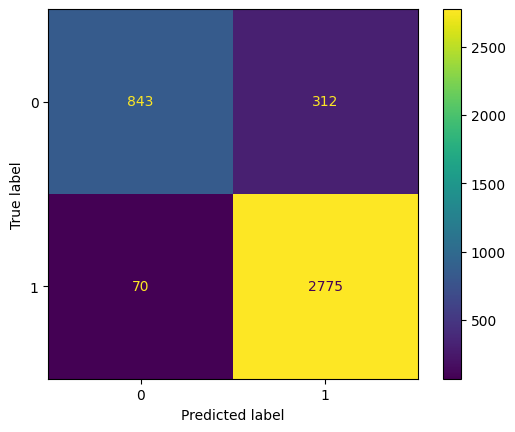

In [55]:
previsoes = grid_search.predict(X_teste)
previsoes[:20]
acuracia = accuracy_score(y_teste, previsoes)
recall = recall_score(y_teste, previsoes, average="macro")
f1 = f1_score(y_teste, previsoes, average="macro")
precision = precision_score(y_teste, previsoes, average="macro")

confusao = ConfusionMatrixDisplay.from_estimator(grid_search, X_teste, y_teste)
print("Acurácia: ", acuracia)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("Precision: ", precision)

In [56]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1155
           1       0.90      0.98      0.94      2845

    accuracy                           0.90      4000
   macro avg       0.91      0.85      0.88      4000
weighted avg       0.91      0.90      0.90      4000



## H2O
Também vamos utilizar Auto Machine Learning do H2O para busca do melhor modelo

In [19]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.421-b09, mixed mode)
  Starting server from C:\Users\roni_\anaconda3\envs\new_environment\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\roni_\AppData\Local\Temp\tmpz1n_tpua
  JVM stdout: C:\Users\roni_\AppData\Local\Temp\tmpz1n_tpua\h2o_roni__started_from_python.out
  JVM stderr: C:\Users\roni_\AppData\Local\Temp\tmpz1n_tpua\h2o_roni__started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 15 days
H2O_cluster_name:,H2O_from_python_roni__2nft2y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.532 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [20]:
dados = h2o.H2OFrame(insurance)
dados

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,RuggedAuto,Accident,Mileage,Antilock,DrivingSkill,ThisCarCost,Theft,CarValue,HomeBase,AntiTheft,OtherCar,MedCost,ILiCost
0,1,1,0,1,0,0,3,0,2,2,0,1,0,0,1,3,3
0,2,1,1,0,1,1,3,0,1,3,0,3,0,1,1,3,3
0,2,2,3,0,1,1,0,1,1,3,0,4,0,0,0,3,3
0,0,0,2,1,0,1,1,0,1,3,0,1,3,0,1,3,3
0,0,1,2,1,1,0,1,0,2,2,0,1,0,0,0,3,3
0,1,2,2,0,0,0,1,1,2,0,0,4,3,1,1,2,3
0,2,2,2,0,1,0,2,0,2,2,0,3,2,1,0,3,3
0,1,1,2,1,0,0,3,0,2,2,0,3,0,0,1,3,3
0,1,1,2,1,0,0,3,0,2,2,0,1,0,0,0,2,3
1,0,1,1,1,1,0,3,0,2,2,0,1,0,1,1,3,3


In [21]:
treino, teste = dados.split_frame(ratios=[.7], seed=3215)
teste.shape

(5943, 18)

In [22]:
treino["Accident"] = treino["Accident"].asfactor()
teste["Accident"] = teste["Accident"].asfactor()

### Treinamento H2O

In [23]:
modelo_h2o = H2OAutoML(nfolds=0, balance_classes=True, max_runtime_secs=900, seed=3215, sort_metric="AUC")
modelo_h2o.train(y="Accident", training_frame=treino, validation_frame=teste)

AutoML progress: |
08:53:38.277: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20250217_85338_model_43


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    90                 90                          14257                  3            3            3             6             8             7.96667

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.08488264886300917
RMSE: 0.29134626969125443
LogLoss: 0.2728952137893056
Mean Per-Class Error: 0.10327504350759723
AUC: 0.961048132731401
AUCPR: 0.9528461270699768
Gini: 0.922096265462802

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.626284444792945
       0     1      Error    Rate
-----  ----  -----  -------  ----------------
0      8844  1211   0.1204   (1211.0/10055.0)
1      865   9180   0.0861   (865.0/10045.0)
Total  9709  10391  0.1033   (2076.0/20100.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.626284     0.898415  170
max f2                       0.42703      0.938236  265
max f0point5                 0.892        0.912134  91
max accuracy                 0.664678     0.898458  153
max precision                0.994106     1         0
max recall                   0.244585     1         315
max specificity              0.994106     1         0
max absolute_mcc             0.664678     0.796921  153
max min_per_class_accuracy   0.658351     0.897364  156
max mean_per_class_accuracy  0.664678     0.898457  153
max tns                      0.994106     10055     0
max fns                      0.994106     10002     0
max fps                      0.00336291   10055     399
max tps                      0.244585     10045     315
max tnr                      0.994106     1         0
max fnr                      0.994106     0.995719  0
max fpr                      0.00336291   1         399
max tpr                      0.244585     1         315

Gains/Lift Table: Avg response rate: 49,98 %, avg score: 56,76 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100995                   0.99255            2.001     2.001              1                0.993319    1                           0.993319            0.0202091       0.0202091                  100.1     100.1              0.0202091
2        0.0201493                   0.990997           2.001     2.001              1                0.99167     1                           0.992496            0.0201095       0.0403186                  100.1     100.1              0.0403186
3        0.03                        0.98932            2.001     2.001              1                0.990111    1                           0.991713            0.0197113       0.0600299                  100.1     100.1              0.0600299
4        0.040398                    0.987804           1.95312   1.98867            0.976077         0.98844     0.993842                    0.990871            0.0203086       0.0803385                  95.3125   98.8674            0.0798412
5        0.05                        0.986322           1.98026   1.98706            0.989637         0.987108    0.9

In [24]:
previsoes_h2o = modelo_h2o.predict(teste)
previsoes_h2o = previsoes_h2o.as_data_frame(use_multi_thread=True)
previsoes_h2o

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,predict,p0,p1
0,0,0.976765,0.023235
1,0,0.988035,0.011965
2,0,0.990670,0.009330
3,1,0.037839,0.962161
4,1,0.108781,0.891219
...,...,...,...
5938,1,0.014241,0.985759
5939,1,0.037297,0.962703
5940,1,0.011778,0.988222
5941,1,0.352413,0.647587


In [25]:
teste = teste.as_data_frame(use_multi_thread=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### Métricas H2O

In [26]:
print(classification_report(teste["Accident"], previsoes_h2o["predict"]))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83      1652
           1       0.90      0.99      0.94      4291

    accuracy                           0.91      5943
   macro avg       0.93      0.86      0.88      5943
weighted avg       0.92      0.91      0.91      5943



## TpotClassifier
O último que vamos testar é o Tpot

In [27]:
tpot = TPOTClassifier(generations=200, population_size=200, offspring_size=0.2, mutation_rate=0.7, crossover_rate=0.3,
                         max_time_mins=60, scoring="accuracy", n_jobs=5, warm_start=True, config_dict="TPOT sparse", verbosity=2, early_stop=False, random_state=3215)
tpot.fit(X_treino, y_treino)

                                                                              
Best pipeline: GradientBoostingClassifier(Normalizer(input_matrix, norm=max), learning_rate=0.5, max_depth=3, max_features=0.9000000000000001, min_samples_leaf=12, min_samples_split=19, n_estimators=100, subsample=0.9000000000000001)


TPOTClassifier(config_dict='TPOT NN', crossover_rate=0.3, early_stop=False,
               generations=200, max_time_mins=60, mutation_rate=0.7, n_jobs=5,
               offspring_size=0.2, population_size=200, random_state=3215,
               scoring='accuracy', verbosity=2, warm_start=True)

In [28]:
previsoes_tpot = tpot.predict(X_teste)
previsoes_tpot[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int8)

### Métricas TPOT

In [29]:
print(classification_report(y_teste, previsoes_tpot))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1155
           1       0.91      0.95      0.93      2845

    accuracy                           0.90      4000
   macro avg       0.88      0.86      0.87      4000
weighted avg       0.89      0.90      0.89      4000



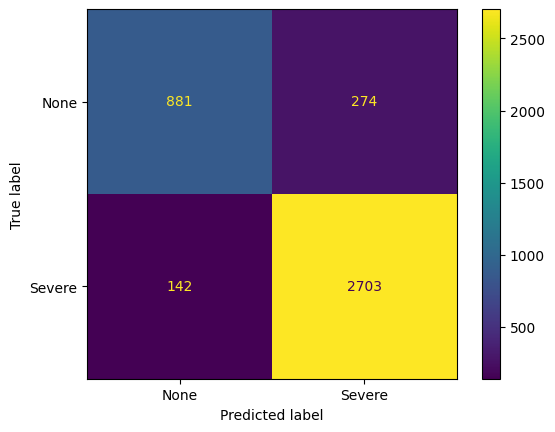

In [30]:
confusao = ConfusionMatrixDisplay.from_predictions(y_teste,previsoes_tpot, display_labels=["None", "Accident"])

Nesse ponto temos nosso modelo escolhido.....
O RandomForest obteve um desempenho excelente, por essa razão e também por questões de desempenho vamos utilizá-lo em nossas previsões....
Isso será implementado através do arquivo python 'Classificacao-Seguros.py', bem como a disponibilização do modelo através do Streamlit

# 